In [1]:
#----Initialization----------------------
import numpy as np
import pandas as pd
import tensorflow
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from scipy.special import softmax
from scipy import sparse
from scipy.optimize import leastsq
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import math
pi=math.pi
exp=math.exp

In [2]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

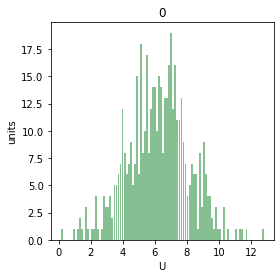

In [3]:
inp_up=np.loadtxt('Gfupin.dat') # input with 2,4,6 orbital 100 random U
inp_dw=np.loadtxt('Gfdwin.dat')
out_up=np.loadtxt('Gfupout.dat') # output with 8 orbital 100
out_dw=np.loadtxt('Gfdwout.dat')
#------------------To cross check we reshape-------------
Ginp_up=np.reshape(inp_up, (500,256*3), order='C')
Ginp_dw=np.reshape(inp_dw, (500,256*3),order='C')
Gout_up=np.reshape(out_up, (500,256),order='C')
Gout_dw=np.reshape(out_dw, (500,256),order='C')

tmp=np.reshape(Ginp_up,(500,256,3))
tmpdw=np.reshape(Ginp_dw,(500,256,3))

interaction=np.loadtxt('../U.dat')
dfint=pd.DataFrame(data=interaction)
dfint.hist(bins=100, grid=False, figsize=(4,4), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel('U')
plt.ylabel("units")
plt.show()

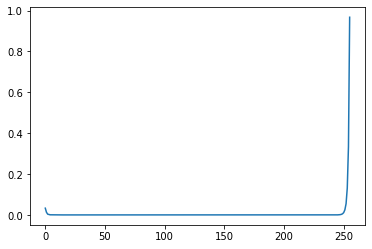

In [4]:
plt.plot(tmp[66,:,1])

In [5]:
wn=np.arange(0,256)
x=wn
y=tmp[66,:,1]+0.0001


In [6]:
def func2(params, x, y):
    a,b,c,d,e=params[0], params[1], params[2],params[3], params[4]
    residual=y-(a*np.exp(b*x**2-c*x-d)+e)
    return residual

In [7]:
params = [0, 0, 0, 0, 0]
result = leastsq(func2, params, (x, y),maxfev=20000)
a, b, c,d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
print(a,b,c,d,e)
yfit1=a*np.exp(b*x**2-c*x-d)+e

7.63410025619908e-61 0.003997471918049407 1.0061060756343603 -135.0104428656742 0.00021786313779430217


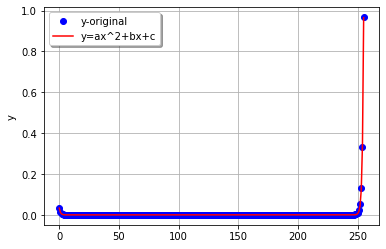

In [8]:
x=wn
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, color="red", label="y=ax^2+bx+c")
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9]:
popt_f=[]
for i in range(500): 
    params = [0, 0, 0, 0, 0]
    ydata=tmp[i,:,0]+0.0001
    result = leastsq(func2, params, (wn, ydata),maxfev=20000)
    a, b, c, d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
    print(i)
    popt_f.append([a,b,c,d,e])

d2orb=pd.DataFrame(popt_f)   
d2orb.columns=['param02','param12','param22','param32','param42']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

            param02     param12     param22     param32     param42
count  5.000000e+02  500.000000  500.000000  500.000000  500.000000
mean   7.137601e-01    0.001650    0.418620  -11.009684    0.013670
std    4.636267e-01    0.000636    0.165598   27.071019    0.011993
min    2.768621e-62    0.000606   -0.000009 -138.290523    0.000188
25%    5.193352e-01    0.001117    0.284010    0.360712    0.000575
50%    6.574420e-01    0.001591    0.409448    0.476091    0.020449
75%    9.375679e-01    0.002045    0.519870    0.502707    0.024370
max    2.037052e+00    0.004528    1.168711    0.892644    0.035037


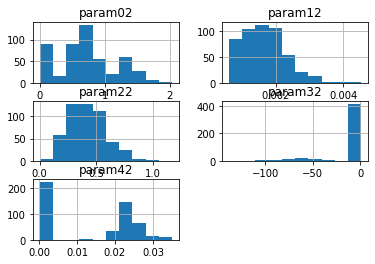

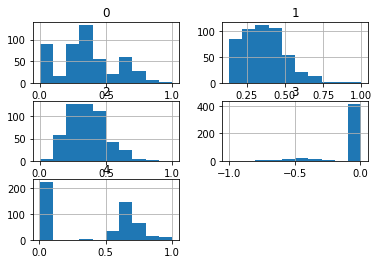

In [10]:
d2orb
print(d2orb.describe())
d2orb.hist()
plt.show()
from sklearn.preprocessing import MaxAbsScaler
trans = MaxAbsScaler()
data = trans.fit_transform(d2orb)
data2=pd.DataFrame(data)
data2.hist()
plt.show()

In [11]:
popt_f=[]
for i in range(500):
    params = [0, 0, 0, 0, 0]
    ydata=tmp[i,:,1]+0.001
    result = leastsq(func2, params, (wn, ydata), maxfev=20000)
    a, b, c,d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
    print(i)
    popt_f.append([a,b,c,d,e])
d4orb=pd.DataFrame(popt_f)
d4orb.columns=['param04','param14','param24','param34','param44']
d4orb

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,param04,param14,param24,param34,param44
0,4.243333e-36,0.002466,0.618898,-78.817931,0.001315
1,7.317011e-01,0.000802,0.205160,0.491987,0.025700
2,1.634761e-36,0.002498,0.626841,-79.752437,0.001309
3,1.476489e+00,0.002761,0.714770,0.462798,0.001261
4,1.222850e-20,0.001551,0.388353,-43.809555,0.001567
...,...,...,...,...,...
495,5.147346e-32,0.002216,0.555737,-69.567616,0.001369
496,1.374751e+00,0.001848,0.479366,0.463824,0.001465
497,1.269077e+00,0.001466,0.380925,0.442293,0.001607
498,1.265091e+00,0.002734,0.707898,0.309610,0.001265


            param04     param14     param24     param34     param44
count  5.000000e+02  500.000000  500.000000  500.000000  500.000000
mean   7.739275e-01    0.001895    0.481550  -23.583127    0.003829
std    8.055857e-01    0.000680    0.178092   34.839966    0.007618
min    7.627204e-61    0.000753   -0.000033 -135.011347    0.001118
25%    6.804023e-25    0.001387    0.355795  -51.414326    0.001343
50%    8.855005e-01    0.001882    0.482414    0.446529    0.001457
75%    1.374825e+00    0.002336    0.595131    0.470695    0.001655
max    1.124518e+01    0.003997    1.022617    2.518691    0.036112


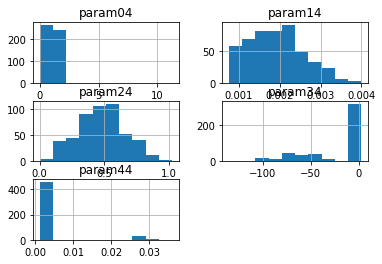

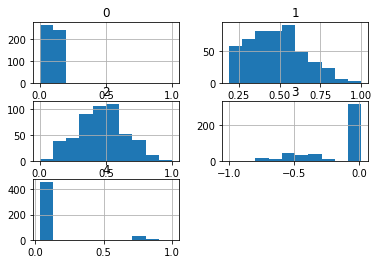

In [12]:
d4orb
print(d4orb.describe())
d4orb.hist()
plt.show()
from sklearn.preprocessing import MaxAbsScaler
trans = MaxAbsScaler()
data = trans.fit_transform(d4orb)
data4=pd.DataFrame(data)
data4.hist()
plt.show()

In [13]:
popt_f=[]
for i in range(500):
    params = [0, 0, 0, 0, 0]
    ydata=tmp[i,:,2]+0.0001
    result = leastsq(func2, params, (wn, ydata),maxfev=20000)
    a, b, c,d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
    print(i)
    popt_f.append([a,b,c,d,e])
d6orb=pd.DataFrame(popt_f)
d6orb.columns=['param06','param16','param26','param36','param46']
d6orb

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,param06,param16,param26,param36,param46
0,1.361530,0.002465,0.638517,0.398560,0.000416
1,1.171832,0.001028,0.267442,0.478572,0.001154
2,1.445058,0.002497,0.646721,0.456073,0.000412
3,1.468707,0.002760,0.714529,0.457626,0.000363
4,1.354759,0.001549,0.402275,0.492659,0.000671
...,...,...,...,...,...
495,1.434232,0.002214,0.573861,0.469150,0.000473
496,1.378370,0.001845,0.478794,0.466828,0.000568
497,1.299771,0.001464,0.380286,0.466747,0.000710
498,1.169881,0.002733,0.707612,0.231481,0.000369


            param06       param16     param26     param36     param46
count  5.000000e+02  5.000000e+02  500.000000  500.000000  500.000000
mean   7.255783e-01  1.898418e-03    0.481850  -25.322082   -0.007631
std    6.769938e-01  6.998991e-04    0.183534   35.363708    0.195477
min    2.890689e-62  6.715637e-07   -0.000110 -138.244598   -4.369278
25%    2.945612e-26  1.371329e-03    0.353640  -55.633144    0.000445
50%    8.765690e-01  1.885341e-03    0.477969    0.443923    0.000556
75%    1.382162e+00  2.337892e-03    0.595604    0.471719    0.000760
max    4.390007e+00  4.532429e-03    1.169816    0.873674    0.035218


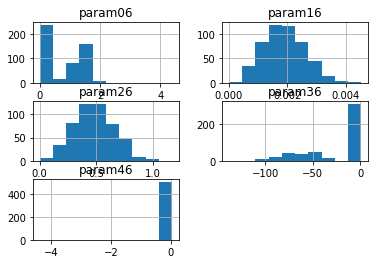

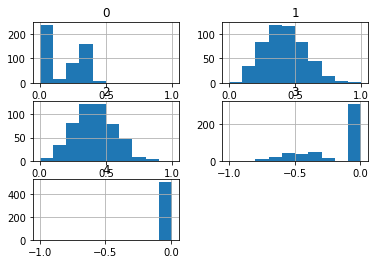

In [14]:
d6orb
print(d6orb.describe())
d6orb.hist()
plt.show()
from sklearn.preprocessing import MaxAbsScaler
trans = MaxAbsScaler()
data = trans.fit_transform(d6orb)
data6=pd.DataFrame(data)
data6.hist()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[<AxesSubplot:title={'center':'param08'}>]], dtype=object)

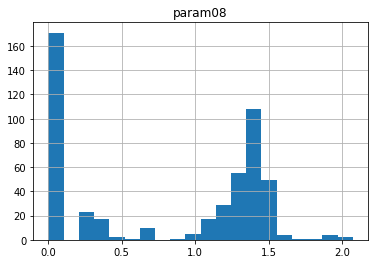

In [15]:
popt_f=[]
for i in range(500):
    params = [0, 0, 0, 0, 0]
    ydata=Gout_up[i,:]+0.0001
    result = leastsq(func2, params, (wn, ydata),maxfev=20000)
    a, b, c,d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
    print(i)
    popt_f.append([a,b,c,d,e])
d8orb=pd.DataFrame(popt_f)
d8orb.columns=['param08','param18','param28','param38','param48']
d8orb.hist(column='param08',bins=20)

            param08     param18     param28     param38     param48
count  5.000000e+02  500.000000  500.000000  500.000000  500.000000
mean   7.944702e-01    0.001902    0.484009  -21.838018    0.001466
std    6.545763e-01    0.000687    0.180348   34.370082    0.004797
min    2.890689e-62    0.000604   -0.000037 -138.244598    0.000211
25%    3.584129e-23    0.001373    0.353889  -48.779158    0.000446
50%    1.153030e+00    0.001888    0.481267    0.453862    0.000556
75%    1.391276e+00    0.002337    0.605306    0.473166    0.000761
max    2.074312e+00    0.004096    1.031029    0.869953    0.035247


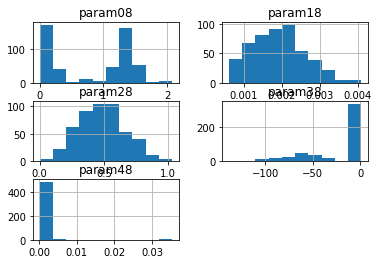

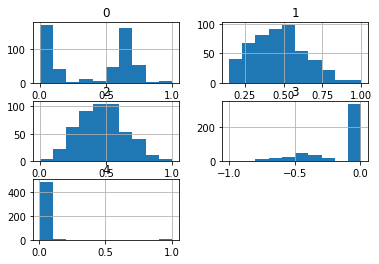

In [16]:
d8orb
print(d8orb.describe())
d8orb.hist()
plt.show()
from sklearn.preprocessing import MaxAbsScaler
trans = MaxAbsScaler()
data = trans.fit_transform(d8orb)
data8=pd.DataFrame(data)
data8.hist()
plt.show()

In [17]:
Gin = pd.concat([data2, data4,data6], axis=1)
Gin_new=Gin.round(decimals=4)
data8_new=data8.round(decimals=4)
X=Gin_new.to_numpy()
y=data8_new.to_numpy()
print(y.shape[1])


5


In [43]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mae', optimizer='adam')
    return model

In [62]:
def evaluate_model(X, y):
    all_scores = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        history=model.fit(X_train, y_train, verbose=0, epochs=500, validation_data=(X_test,y_test))
        print(history.history.keys())
        # evaluate model on test set
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(scores)
        #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        #all_scores.append(scores[1])
    return  all_scores
 

In [63]:
# evaluate model
all_scores = evaluate_model(X, y)

dict_keys(['loss', 'val_loss'])
0.10241523385047913
dict_keys(['loss', 'val_loss'])
0.086449034512043
dict_keys(['loss', 'val_loss'])
0.0996016338467598
dict_keys(['loss', 'val_loss'])
0.09404903650283813
dict_keys(['loss', 'val_loss'])
0.09647995233535767
dict_keys(['loss', 'val_loss'])
0.11997345089912415
dict_keys(['loss', 'val_loss'])
0.10894754528999329
dict_keys(['loss', 'val_loss'])
0.11296102404594421
dict_keys(['loss', 'val_loss'])
0.11161939799785614
dict_keys(['loss', 'val_loss'])
0.09998262673616409
dict_keys(['loss', 'val_loss'])
0.09331058710813522
dict_keys(['loss', 'val_loss'])
0.11495889723300934
dict_keys(['loss', 'val_loss'])
0.09923794120550156
dict_keys(['loss', 'val_loss'])
0.15231187641620636
dict_keys(['loss', 'val_loss'])
0.09282214939594269
dict_keys(['loss', 'val_loss'])
0.09011051803827286
dict_keys(['loss', 'val_loss'])
0.11953660845756531
dict_keys(['loss', 'val_loss'])
0.08159047365188599
dict_keys(['loss', 'val_loss'])
0.11055009812116623
dict_keys(['los

In [ ]:
from keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2

values = [1e-4]
all_train, all_test = list(), list()
for params in values:
    model = Sequential()
    model.add(Dense(10, activation = 'relu',input_shape=(15,)))
    #model.add(Dense(10, activation = 'relu',kernel_initializer='he_uniform'))
    model.add(Dense(5))
    #model.compile(loss = 'mae', optimizer = RMSprop(), metrics = ['accuracy'])
    model.compile(loss = 'mae', optimizer = 'adam', metrics = ['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=20, epochs = 2000, verbose = 1, validation_data=(X_test,y_test))
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (params, train_acc, test_acc))
    
    
    all_test.append(test_acc)  

In [25]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='valLoss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X_test) 
print(prediction.shape) 
ypred=prediction
print(ypred.shape)

In [ ]:
ypred

In [ ]:
a=ypred[0][0]
b=ypred[0][1]
c=ypred[0][2]
d=ypred[0][3]
e=ypred[0][4]